In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Telco-Customer-Churn.csv")

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [40]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors ="coerce")
df.dropna(inplace=True)

In [41]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [42]:
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

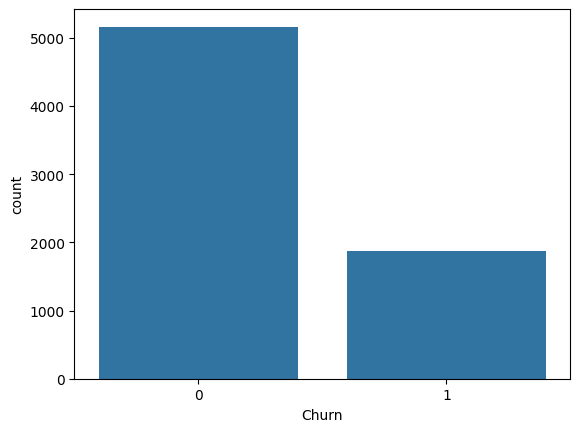

In [43]:
sns.countplot(x='Churn', data=df)
plt.show()


In [44]:
X = df.drop(["Churn","customerID"], axis= 1)
y = df["Churn"]

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [46]:
X_train.shape, y_test.shape,

((5625, 19), (1407,))

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), numeric_features),
        ('cat',OneHotEncoder(drop='first'),categorical_features)
]
)


In [49]:
from sklearn.linear_model import LogisticRegression

log_model = Pipeline(steps= [
    ('preprocessor',preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train,y_train)

y_pred_log = log_model.predict(X_test)

In [50]:
y_pred_log

array([0, 1, 0, ..., 0, 0, 0], shape=(1407,))

In [51]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(
        n_estimators = 200,
        max_depth = 10,
        random_state = 42
    ))
])

rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [55]:
from sklearn.svm import SVC


svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True))
])

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [56]:
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



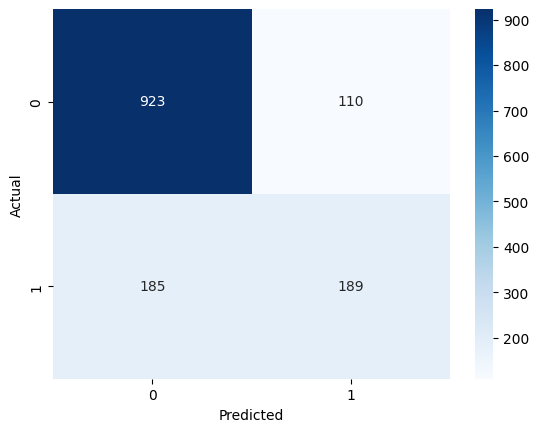

In [57]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [58]:
from sklearn.metrics import roc_auc_score


y_prob = rf_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)


0.8344329635400758

In [59]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None]
}

grid = GridSearchCV(
    rf_model,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [5, 10, ...], 'classifier__n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [63]:
grid.best_params_
grid.best_score_


np.float64(0.5802588639299513)